# TASK 2: UNEMPLOYMENT ANALYSIS WITH PYTHON

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
file_path = 'C:\\Users\\murug\\OneDrive\\Desktop\\Unemployment in India.csv'  # Adjust the path as necessary
data = pd.read_csv( 'C:\\Users\\murug\\OneDrive\\Desktop\\Unemployment in India.csv')


## Display the first few rows of the dataset

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [4]:
# Clean the dataset
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format='%d-%m-%Y')

# Drop unnecessary columns (Frequency and any others you don't need)
data = data.drop(columns=['Frequency'])

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Basic data exploration
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                    

## Data visualization: Unemployment rate over time for each region

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


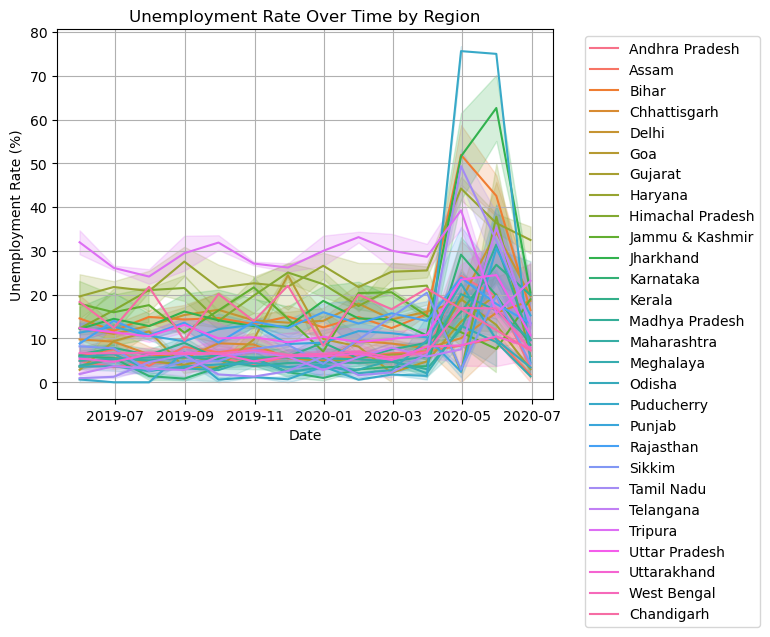

In [5]:
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=data)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Data preprocessing: Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Region', 'Area'], drop_first=True)


In [ ]:
# Features and target variable
X = data_encoded.drop(columns=['Estimated Unemployment Rate (%)', 'Date'])
y = data_encoded['Estimated Unemployment Rate (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


## Evaluate the model

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")
print(f"Model R-squared: {r2:.2f}")


Model Mean Squared Error: 52.22
Model R-squared: 0.64


## Visualizations


### 1.Bar chart of average unemployment rate by region


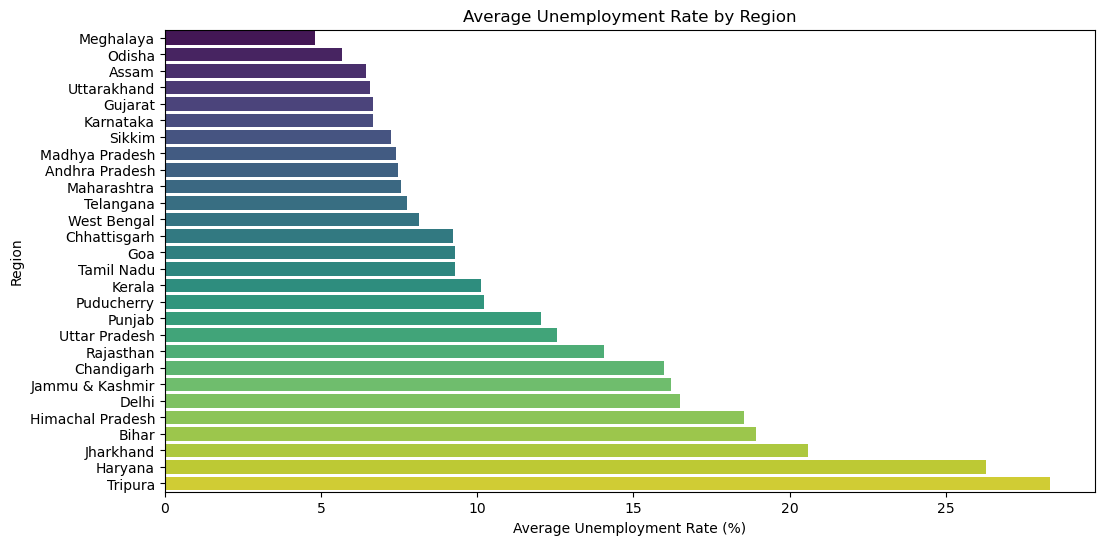

In [9]:
plt.figure(figsize=(12, 6))
avg_unemployment_by_region = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=avg_unemployment_by_region.values, y=avg_unemployment_by_region.index, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


### 2.Heatmap of unemployment rate over time (subset of regions)

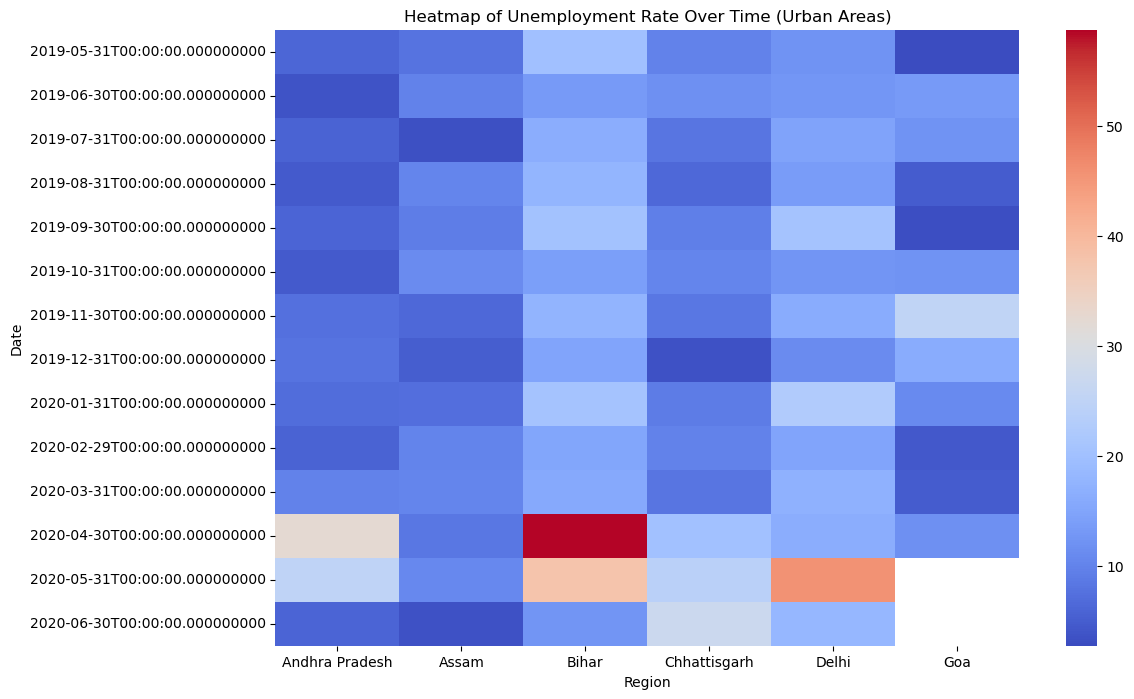

In [10]:
subset_data = data[(data['Region'].isin(data['Region'].unique()[:6])) & (data['Area'] == 'Urban')]
pivot_data = subset_data.pivot_table(index='Date', columns='Region', values='Estimated Unemployment Rate (%)')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of Unemployment Rate Over Time (Urban Areas)')
plt.xlabel('Region')
plt.ylabel('Date')
plt.show()


### 3.Scatter plot of unemployment rate vs. labor participation rate

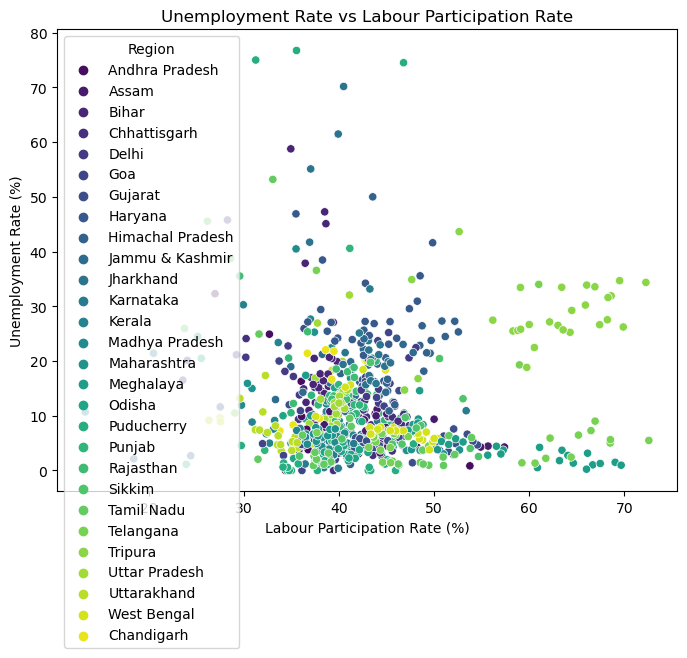

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region', data=data, palette='viridis')
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()